# Summary of Changes
The following key changes were made to this python notebook for the sake of convenience in running the notebook.

    1. Added new problem formulation function which moves the individual actor problem formulations to a separate python (see 'get_model_for_actor_problem_formulation' in 'problem_formulation_V2_0.py') file for additional notes.
        - The 'problem_formulation_actor' function is now removed from this notebook as a result
    2. Added 'DikeNetworkTS' class for time series outcomes in the 'dike_model_function_V2_0.py' file.

In [14]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import prim

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, TimeSeriesOutcome, IntegerParameter, RealParameter)

from dike_model_function_V2_0 import (DikeNetwork,DikeNetworkTS)  # @UnresolvedImport
from problem_formulation_V2_1 import get_model_for_actor_problem_formulation

C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



In [2]:
# Problem formulations:
#    get_model_for_actor_problem_formulation(problem_formulation_id, outcome_type='time_series')
#    problem_formulation_id options
#        1 - RWS (GOOD)
#        2 - Environmental interest group
#        3 - Transport company 
#        4 - Delta commission
#        5 - Gelderland (GOOD)
#        6 - Overijssel (GOOD)s
#        7 - Dike rings 1 and 2
#        8 - Dike ring 3
#        9 - Dike ring 4
#        10 - Dike ring 5
#        11 - RWS formulation 2
#
#    outcome_type options
#        'time_series' (default)
#        'scalar'


model, planning_steps = get_model_for_actor_problem_formulation(1,outcome_type='scalar')

In [3]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)

if __name__ == '__main__':
    with MultiprocessingEvaluator(model) as evaluator:
        experiments, outcomes = evaluator.perform_experiments(scenarios=500, policies=20)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 500 scenarios * 20 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
#started at 15:25
#ended at 17:01

In [6]:
#Saving the results
import ema_workbench
#results = experiments, outcomes
#ema_workbench.util.utilities.save_results(results, 'results-500s-20p.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\User\Documents\GitHub\sassy_lion\RobWorkingFolder\ErikWorkingFolder\results-500s-20p.tar.gz


In [7]:
#experiments_uncertainties = experiments.iloc[:,0:16]
experiments_uncertainties = experiments.drop(experiments.columns[16:-2], axis=1)
experiments_levers = experiments.iloc[:,16:-1]

In [12]:
outcomes.keys()

dict_keys(['Expected Annual Damage Gelderland', 'Dike Investment Costs Gelderland', 'Expected Number of Deaths in Gelderland', 'Expected Annual Damage Overijssel', 'Dike Investment Costs Overijssel', 'Expected Number of Deaths in Overijssel', 'RfR Total Costs', 'Expected Total Evacuation Costs'])

In [26]:
data = outcomes['Expected Annual Damage Gelderland']

y = data > np.percentile(data, 90)

prim_alg = prim.Prim(experiments_uncertainties,y, threshold=0.7)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] mean: 0.700381679389313, mass: 0.0524, coverage: 0.367, density: 0.700381679389313 restricted_dimensions: 4


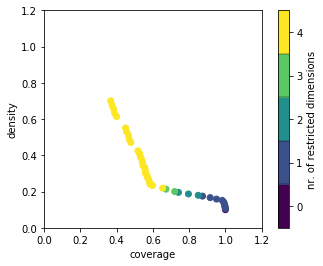

In [27]:
box1.show_tradeoff()
plt.show()

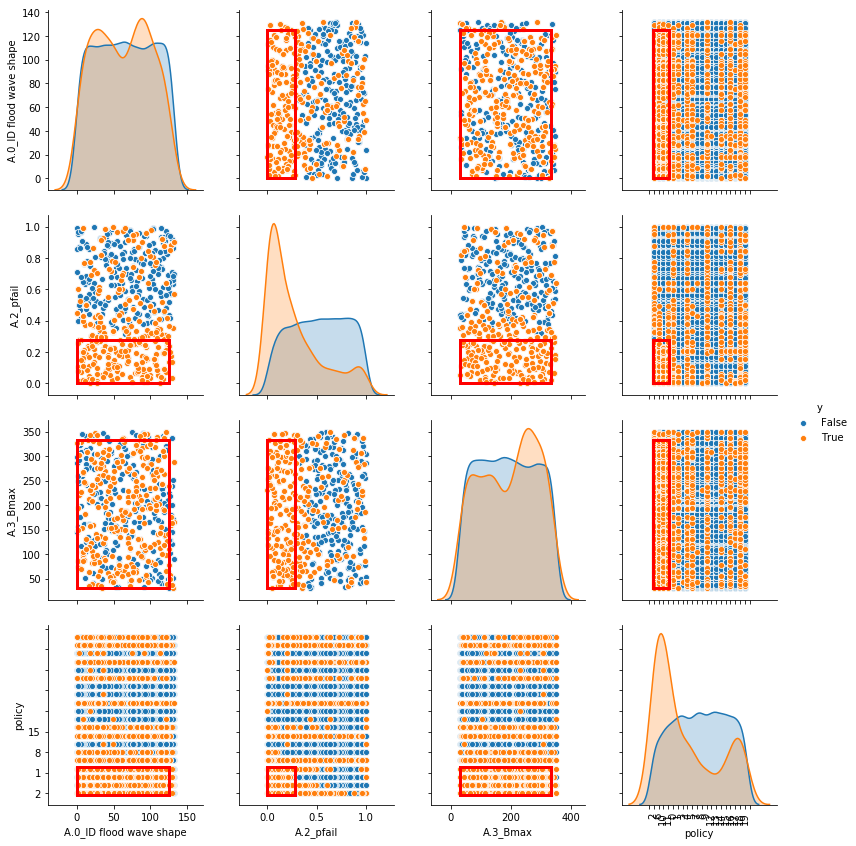

In [28]:
from ema_workbench.analysis import dimensional_stacking
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category


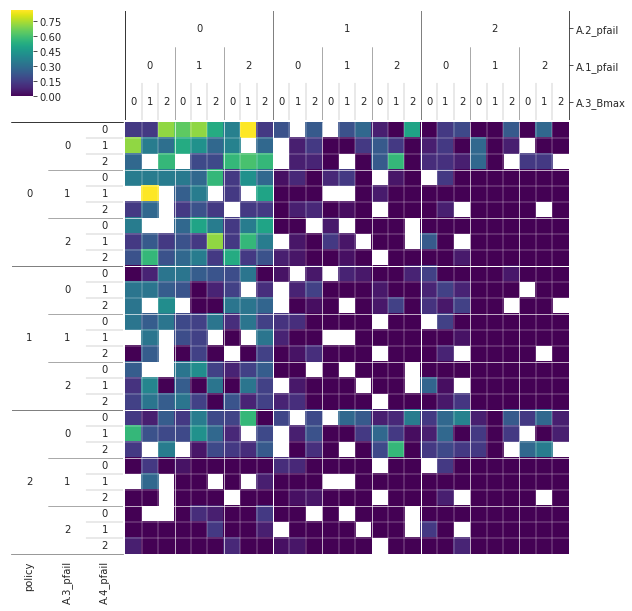

In [29]:
dimensional_stacking.create_pivot_plot(experiments_uncertainties, y,nbins=3, nr_levels=3)
#plt.savefig('Worst-ExpectedAnnualDamage-15000s-1p.png')
plt.show()